<h1><center>DS 300: Take-home Quiz 4 - ANN</center></h1>

In the past, you have been working with the Home Value Prediction data. In this lab, we’ve reduced the number of input features and changed the task into predicting whether the house price is above or below median value. You will create your own neural network to perform the prediction task. 

Since this dataset is familiar to us and much simplified, some questions in this lab will be open-ended just like you will see in the real-life interview. 

You have some major goals here: 

+ Question 1 (25 Points): Load the dataset and perform data preprocessing. 
+ Question 2 (25 Points): Perform exploratory data analysis and render some insights. 
+ Question 3 (25 Points): Build an ANN model with Keras and try to get the prediction accuracy over 85%.
+ Question 4 (25 Points): Plot the model accuracy and model loss in two graphs with training and validation over epochs. 

Something you may want to consider:

1. Try different scalers in the data preprocessing. E.g., MinMaxScaler() vs StandardScaler()
2. Try to split your dataset into the following percentage: 1) Training set (70%); 2) Test set (15%); 3) Validation set (15%). The validation set can be used in the `training` step in ANN modeling. You may want to run `train_test_split` twice to achieve this goal.

Dataset can be found at: [url](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab7_house.csv).


## Question 1

#### Import all the necessary libraries

In [1]:
# Importing the libraries








#### Load the dataset from [url](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab7_house.csv) into a DataFrame named as `df`.

In [2]:
url = 


df = 



In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


Now, we split the dataset into our input features and the label we wish to predict.

In [4]:
X = 


y = 



Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [5]:
from sklearn import preprocessing

In [6]:
min_max_scaler = 


X_scale = 



In [7]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [8]:
from 


In [9]:
X_train, X_val_and_test, y_train, y_val_and_test = 



In [10]:
X_val, X_test, y_val, y_test = 



In [11]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Question 2: EDA

Use your own knowledge to achieve this. Render some interesting results!

At least four different graphs and the corresponding observations have to be provided to receive full credits. 

## Question 3: Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [12]:
from 


We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [13]:
model = 







Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [14]:
model.







Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch, we use 32
- how long we want to train it for (epochs), we use 100
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [15]:
hist = 






Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7043 - accuracy: 0.5010 - val_loss: 0.6928 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5254 - val_loss: 0.6800 - val_accuracy: 0.6530
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.7446 - val_loss: 0.6712 - val_accuracy: 0.7808
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.7583 - val_loss: 0.6638 - val_accuracy: 0.7808
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.7632 - val_loss: 0.6569 - val_accuracy: 0.7489
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.7505 - val_loss: 0.6503 - val_accuracy: 0.7534
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.7613 - val_loss: 0.6436 - val_accuracy: 0.7626
Epoch 8/100
3

Evaluating our data on the test set:

7/7 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8904


0.8904109597206116

## Question 4: Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [17]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

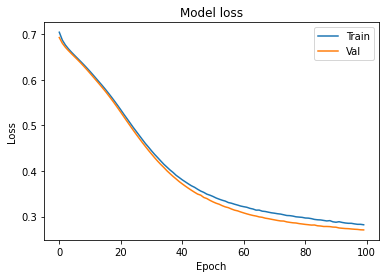

In [18]:
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')





plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

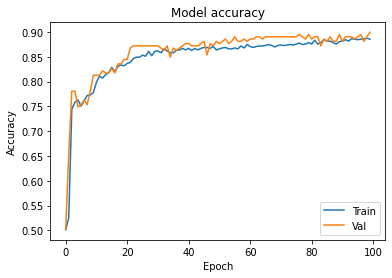

In [19]:
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')







plt.show()

#### Can you improve the model accuracy even further? Try some other approaches!